In [2]:
#Cell_1.
import pandas as pd 
df = pd.read_csv('height.csv',sep=" ")
display(df.head())
df.corr()

,No,age,height,weight,scores
0,1,12,153.5,52.4,22
1,2,12,167.0,54.9,10
2,3,12,148.1,33.5,38
3,4,12,150.5,36.0,4
4,5,12,144.4,42.9,16


,No,age,height,weight,scores
No,1.000000,0.985637,0.718175,0.557827,0.798662
age,0.985637,1.000000,0.709756,0.554966,0.816722
height,0.718175,0.709756,1.000000,0.760164,0.621977
weight,0.557827,0.554966,0.760164,1.000000,0.525637
scores,0.798662,0.816722,0.621977,0.525637,1.000000


<Axes: xlabel='height', ylabel='scores'>

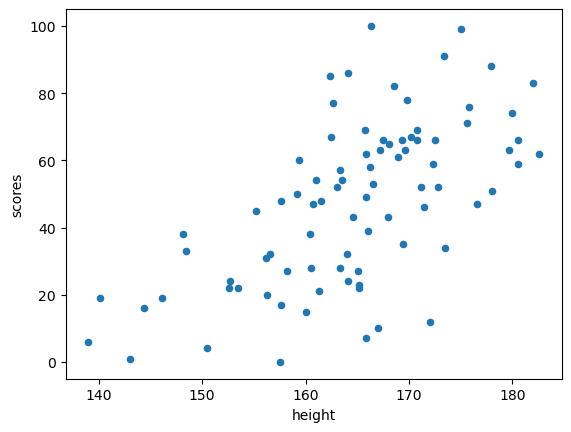

In [3]:
#Cell_2.
#scatter plot.
df[['height','scores']].plot(kind='scatter',x='height',y='scores')

<Axes: xlabel='age', ylabel='scores'>

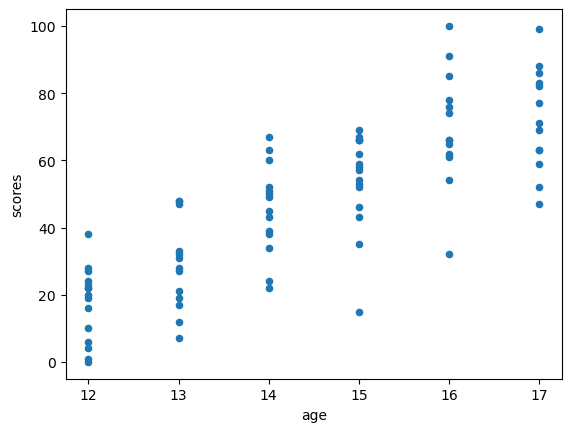

In [4]:
#Cell_3.
#scatter plot.
df[['age','scores']].plot(kind='scatter',x='age',y='scores')

In [5]:
#Cell_4.
import numpy as np
import pandas as pd

df = pd.read_csv('height.csv',sep=" ")
y=df['scores']
x=df['height']
z=df['age']
y=np.array(y)
x=np.array(x)
z=np.array(z)

import math
def partial_corr(z,x,y):
    correlation_matrix = np.corrcoef((z,x,y))
    r_zx = correlation_matrix[0,1]
    r_zy = correlation_matrix[0,2]
    r_xy = correlation_matrix[1,2]
    r_xy_z = (r_xy-r_zx*r_zy)/(math.sqrt(1-r_zx**2)*math.sqrt(1-r_zy**2))
    return r_xy_z

print("Correlation of x and y is {0}:".format(np.corrcoef(x,y)[0,1]))
print("Partial correlation of x and y is {0}:".format(partial_corr(z,x,y) ))

Correlation of x and y is 0.621977000156329:
Partial correlation of x and y is 0.1040706281893541:


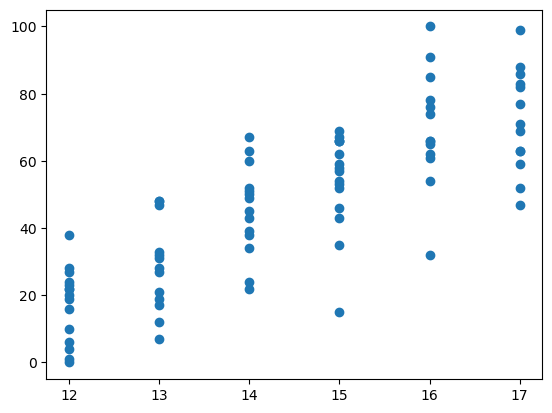

In [6]:
#Cell_5.
#scatter plot.
import matplotlib.pyplot as plt
plt.scatter(z,y)

In [7]:
#Cell_6.
df2=df.drop(columns = ["No","weight"])
display(df2.head())

,age,height,scores
0,12,153.5,22
1,12,167.0,10
2,12,148.1,38
3,12,150.5,4
4,12,144.4,16


In [8]:
#Cell_7.
import scipy
from scipy import linalg

def cor2pcor(R):
    inv_cor = linalg.inv(R)
    rows = inv_cor.shape[0]
    regu_1 = 1 / np.sqrt(np.diag(inv_cor))
    regu_2 = np.repeat(regu_1, rows).reshape(rows, rows)
    pcor = (-inv_cor) * regu_1 * regu_2
    np.fill_diagonal(pcor, 1)
    return pcor
pcor = pd.DataFrame(cor2pcor(df2.corr()), columns=df2.corr().columns, index=df2.corr().index)
display(pcor)

,age,height,scores
age,1.000000,0.446564,0.680321
height,0.446564,1.000000,0.104071
scores,0.680321,0.104071,1.000000


In [9]:
#Cell_8.
df3=df.drop(columns = "No")
display(df3.head())

,age,height,weight,scores
0,12,153.5,52.4,22
1,12,167.0,54.9,10
2,12,148.1,33.5,38
3,12,150.5,36.0,4
4,12,144.4,42.9,16


In [10]:
#Cell_9.
pcor2 = pd.DataFrame(cor2pcor(df3.corr()), columns=df3.corr().columns, index=df3.corr().index)
display(pcor2)

,age,height,weight,scores
age,1.000000,0.381407,-0.050656,0.680886
height,0.381407,1.000000,0.619750,0.012725
weight,-0.050656,0.619750,1.000000,0.110448
scores,0.680886,0.012725,0.110448,1.000000


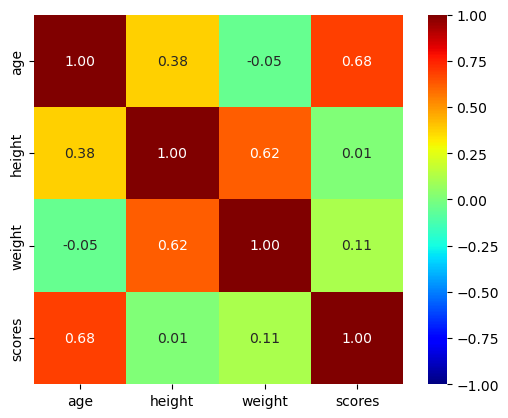

In [11]:
%matplotlib inline
#Cell_10.
import seaborn as sns

sns.heatmap(pcor2, annot=True, square=True, vmin=-1, vmax=1, fmt=".2f", cmap="jet")
plt.show()